# Capstone Project Two:  Youth_Tobacco_Survey_Project

Recap Of This Data Science Problem:

As we all know, Smoking has been implicated in a number of conditions and malignancies including emphysema, lung cancer and the different forms of oral cancer. The U.S Department of Education department is planning to make some policies to help young people who formed a smoking habit according to the data. The purpose of this data science project is to come up with a model for predicting how many young people will give up smoking among these youth tobacco user.

1. Sourcing and Loading

1a. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from io import StringIO  
from IPython.display import Image  
import pydotplus

1b.Loading the data

In [2]:
# import data
df1= pd.read_csv('Youth_Risk_Behavioral_Surveillance_System__YRBSS__Data.csv')
df2= pd.read_csv('Youth_Tobacco_Survey__YTS__Data (1).csv')

2. Cleaning, transforming, and visualizing

2a. Exploring the data

In [3]:
# check the first 5 lines of data
df1.head() 

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,SubMeasure,DataSource,Response,Data_Value_Unit,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,1999,MA,Massachusetts,Tobacco Use - Survey Data,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,YRBSS,Frequent,%,...,"(42.27687047, -72.082690675)",BEH,106BEH,169SSA,1GEN,8AGE,7RAC,2EDU,YRB02,2
1,2005,OH,Ohio,Tobacco Use - Survey Data,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,YRBSS,Current,%,...,"(40.060210141, -82.404260056)",BEH,106BEH,169SSA,1GEN,8AGE,1RAC,2EDU,YRB01,1
2,1997,IA,Iowa,Tobacco Use - Survey Data,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,YRBSS,Current,%,...,"(42.469400913, -93.816490556)",BEH,151BEH,168SSP,2GEN,8AGE,6RAC,2EDU,YRB04,1
3,2007,LA,Louisiana,Tobacco Use - Survey Data,Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,YRBSS,Frequent,%,...,"(31.312660644, -92.445680071)",BEH,153BEH,181CIG,1GEN,8AGE,2RAC,2EDU,YRB10,2
4,2015,ID,Idaho,Tobacco Use - Survey Data,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,YRBSS,Current,%,...,"(43.682630005, -114.363730042)",BEH,153BEH,181CIG,1GEN,8AGE,1RAC,2EDU,YRB09,1


In [4]:
df2.head()

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11


In [5]:
df1.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'SubMeasure', 'DataSource', 'Response',
       'Data_Value_Unit', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Data_Value_Std_Err', 'Low_Confidence_Limit', 'High_Confidence_Limit',
       'Sample_Size', 'Gender', 'Age', 'Race', 'Education', 'GeoLocation',
       'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1',
       'StratificationID2', 'StratificationID3', 'StratificationID4',
       'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [6]:
df2.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [7]:
df1.shape

(38708, 32)

In [8]:
df2.shape

(10600, 31)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38708 entries, 0 to 38707
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        38708 non-null  int64  
 1   LocationAbbr                38708 non-null  object 
 2   LocationDesc                38708 non-null  object 
 3   TopicType                   38708 non-null  object 
 4   TopicDesc                   38708 non-null  object 
 5   MeasureDesc                 38708 non-null  object 
 6   SubMeasure                  38708 non-null  object 
 7   DataSource                  38708 non-null  object 
 8   Response                    38708 non-null  object 
 9   Data_Value_Unit             38708 non-null  object 
 10  Data_Value_Type             38708 non-null  object 
 11  Data_Value                  24275 non-null  float64
 12  Data_Value_Footnote_Symbol  14433 non-null  object 
 13  Data_Value_Footnote         144

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10600 entries, 0 to 10599
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        10600 non-null  int64  
 1   LocationAbbr                10600 non-null  object 
 2   LocationDesc                10600 non-null  object 
 3   TopicType                   10600 non-null  object 
 4   TopicDesc                   10600 non-null  object 
 5   MeasureDesc                 10600 non-null  object 
 6   DataSource                  10600 non-null  object 
 7   Response                    8190 non-null   object 
 8   Data_Value_Unit             10600 non-null  object 
 9   Data_Value_Type             10600 non-null  object 
 10  Data_Value                  10080 non-null  float64
 11  Data_Value_Footnote_Symbol  517 non-null    object 
 12  Data_Value_Footnote         517 non-null    object 
 13  Data_Value_Std_Err          100

In [11]:
df1.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,38708.000000,24275.000000,24275.000000,24275.000000,24275.000000,24275.000000,38708.000000
mean,2008.833109,13.715967,1.460470,11.135267,17.332651,1695.411864,1.717629
std,6.553405,16.349020,1.257424,14.885942,17.745373,3069.954989,0.712968
min,1993.000000,0.000000,0.000000,0.000000,0.000000,100.000000,1.000000
25%,2005.000000,2.300000,0.600000,1.200000,4.400000,412.000000,1.000000
50%,2009.000000,7.500000,1.200000,5.100000,11.200000,935.000000,2.000000
75%,2015.000000,18.200000,2.000000,14.400000,23.450000,1705.000000,2.000000
max,2017.000000,95.200000,13.300000,90.500000,97.600000,54795.000000,3.000000


In [12]:
df2.describe()

,YEAR,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,10600.000000,10080.000000,10080.000000,10083.000000,10080.000000,10080.000000,10600.000000
mean,2007.053491,20.336806,1.851429,16.715253,23.961806,1483.412897,8.106887
std,5.462656,21.168271,1.777441,18.575128,23.981915,2189.565233,3.076806
min,1999.000000,0.000000,0.000000,0.000000,0.000000,50.000000,1.000000
25%,2002.000000,3.000000,0.600000,1.700000,4.300000,671.000000,7.000000
50%,2006.000000,10.550000,1.300000,7.900000,13.200000,1001.000000,9.000000
75%,2011.000000,36.425000,2.400000,29.600000,42.500000,1642.000000,11.000000
max,2017.000000,98.000000,16.100000,97.600000,98.400000,36910.000000,12.000000


2b.Cleaning the data

In [13]:
List=['LocationDesc', 'Data_Value_Unit', 'SubMeasure', 'TopicType', 'MeasureDesc', 'DataSource', 'Response', 'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1','StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID']
df1.drop(columns=List, inplace = True)
df1.head()

,YEAR,LocationAbbr,TopicDesc,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Age,Race,Education,GeoLocation,DisplayOrder
0,1999,MA,Cigarette Use (Youth),Percentage,20.9,NaN,NaN,4.4,13.3,31.3,116.0,Overall,All Ages,Multiple Race,High School,"(42.27687047, -72.082690675)",2
1,2005,OH,Cigarette Use (Youth),Percentage,11.8,NaN,NaN,2.9,7.1,19.1,230.0,Overall,All Ages,African American,High School,"(40.060210141, -82.404260056)",1
2,1997,IA,Smokeless Tobacco Use (Youth),Percentage,22.4,NaN,NaN,2.2,18.2,27.4,756.0,Male,All Ages,All Races,High School,"(42.469400913, -93.816490556)",1
3,2007,LA,Cigar Use (Youth),Percentage,NaN,*,Data in these cells have been suppressed becau...,NaN,NaN,NaN,NaN,Overall,All Ages,American Indian/Alaska Native,High School,"(31.312660644, -92.445680071)",2
4,2015,ID,Cigar Use (Youth),Percentage,NaN,*,Data in these cells have been suppressed becau...,NaN,NaN,NaN,NaN,Overall,All Ages,African American,High School,"(43.682630005, -114.363730042)",1


In [14]:
pd.concat([df1['Data_Value_Footnote_Symbol'],
           df1['Data_Value_Footnote'], 
           df1['Gender'], df1['Age'], df1['Education'], df1['TopicDesc']]).unique()

array([nan, '*',
       'Data in these cells have been suppressed because of a small sample size',
       'Overall', 'Male', 'Female', 'All Ages', 'High School',
       'Middle School', 'Cigarette Use (Youth)',
       'Smokeless Tobacco Use (Youth)', 'Cigar Use (Youth)',
       'E-Cigarette Use (Youth)', 'Any Tobacco Use (Youth)'], dtype=object)

In [15]:
df1.drop(columns=['Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Age'], inplace=True)
df1.head()

,YEAR,LocationAbbr,TopicDesc,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Education,GeoLocation,DisplayOrder
0,1999,MA,Cigarette Use (Youth),20.9,4.4,13.3,31.3,116.0,Overall,Multiple Race,High School,"(42.27687047, -72.082690675)",2
1,2005,OH,Cigarette Use (Youth),11.8,2.9,7.1,19.1,230.0,Overall,African American,High School,"(40.060210141, -82.404260056)",1
2,1997,IA,Smokeless Tobacco Use (Youth),22.4,2.2,18.2,27.4,756.0,Male,All Races,High School,"(42.469400913, -93.816490556)",1
3,2007,LA,Cigar Use (Youth),NaN,NaN,NaN,NaN,NaN,Overall,American Indian/Alaska Native,High School,"(31.312660644, -92.445680071)",2
4,2015,ID,Cigar Use (Youth),NaN,NaN,NaN,NaN,NaN,Overall,African American,High School,"(43.682630005, -114.363730042)",1


In [16]:
df1.rename(columns={'YEAR':'year', 'LocationAbbr':'state', 'TopicDesc':'tabacco_type','Data_Value':'percentage_tabacco_user', 'Gender':'gender', 'Race':'race', 'Education':'education'}, inplace=True)
df1.head()

,year,state,tabacco_type,percentage_tabacco_user,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,gender,race,education,GeoLocation,DisplayOrder
0,1999,MA,Cigarette Use (Youth),20.9,4.4,13.3,31.3,116.0,Overall,Multiple Race,High School,"(42.27687047, -72.082690675)",2
1,2005,OH,Cigarette Use (Youth),11.8,2.9,7.1,19.1,230.0,Overall,African American,High School,"(40.060210141, -82.404260056)",1
2,1997,IA,Smokeless Tobacco Use (Youth),22.4,2.2,18.2,27.4,756.0,Male,All Races,High School,"(42.469400913, -93.816490556)",1
3,2007,LA,Cigar Use (Youth),NaN,NaN,NaN,NaN,NaN,Overall,American Indian/Alaska Native,High School,"(31.312660644, -92.445680071)",2
4,2015,ID,Cigar Use (Youth),NaN,NaN,NaN,NaN,NaN,Overall,African American,High School,"(43.682630005, -114.363730042)",1


In [17]:
List=['LocationDesc', 'Data_Value_Unit', 'TopicType', 'MeasureDesc', 'DataSource', 'Response', 'TopicTypeId', 'TopicId', 'MeasureId', 'StratificationID1','StratificationID2', 'StratificationID3', 'StratificationID4', 'SubMeasureID']
df2.drop(columns=List, inplace = True)
df2.head()

,YEAR,LocationAbbr,TopicDesc,Data_Value_Type,Data_Value,Data_Value_Footnote_Symbol,Data_Value_Footnote,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Age,Education,GeoLocation,DisplayOrder
0,2004,OH,Cigarette Use (Youth),Percentage,32.2,NaN,NaN,3.2,25.8,38.5,1377.0,Overall,All Races,All Ages,Middle School,"(40.060210141, -82.404260056)",8
1,2008,AL,Cigarette Use (Youth),Percentage,47.8,NaN,NaN,2.9,42.1,53.5,654.0,Female,All Races,All Ages,High School,"(32.840571122, -86.631860762)",8
2,2015,WV,Smokeless Tobacco Use (Youth),Percentage,12.7,NaN,NaN,1.9,9.0,16.4,781.0,Male,All Races,All Ages,High School,"(38.665510202, -80.712640135)",12
3,2005,IL,Cigarette Use (Youth),Percentage,28.5,NaN,NaN,2.2,24.2,32.8,1323.0,Overall,All Races,All Ages,Middle School,"(40.485010283, -88.997710178)",8
4,2005,CT,Smokeless Tobacco Use (Youth),Percentage,20.5,NaN,NaN,2.3,16.0,25.1,973.0,Male,All Races,All Ages,High School,"(41.56266102, -72.649840952)",11


In [18]:
pd.concat([df2['Data_Value_Footnote_Symbol'],
           df2['Data_Value_Footnote'], 
           df2['Gender'], df2['Age'], df2['Education'], df2['TopicDesc']]).unique()

array([nan, '*',
       'Data in these cells have been suppressed because of a small sample size',
       'Overall', 'Female', 'Male', 'All Ages', 'Middle School',
       'High School', 'Cigarette Use (Youth)',
       'Smokeless Tobacco Use (Youth)', 'Cessation (Youth)'], dtype=object)

In [19]:
df2.drop(columns=['Data_Value_Type', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Age'], inplace=True)
df2.head()

,YEAR,LocationAbbr,TopicDesc,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Gender,Race,Education,GeoLocation,DisplayOrder
0,2004,OH,Cigarette Use (Youth),32.2,3.2,25.8,38.5,1377.0,Overall,All Races,Middle School,"(40.060210141, -82.404260056)",8
1,2008,AL,Cigarette Use (Youth),47.8,2.9,42.1,53.5,654.0,Female,All Races,High School,"(32.840571122, -86.631860762)",8
2,2015,WV,Smokeless Tobacco Use (Youth),12.7,1.9,9.0,16.4,781.0,Male,All Races,High School,"(38.665510202, -80.712640135)",12
3,2005,IL,Cigarette Use (Youth),28.5,2.2,24.2,32.8,1323.0,Overall,All Races,Middle School,"(40.485010283, -88.997710178)",8
4,2005,CT,Smokeless Tobacco Use (Youth),20.5,2.3,16.0,25.1,973.0,Male,All Races,High School,"(41.56266102, -72.649840952)",11


In [20]:
df2.rename(columns={'YEAR':'year', 'LocationAbbr':'state', 'TopicDesc':'tabacco_type','Data_Value':'percentage_tabacco_user', 'Gender':'gender', 'Race':'race', 'Education':'education'}, inplace=True)
df2.head()

,year,state,tabacco_type,percentage_tabacco_user,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,gender,race,education,GeoLocation,DisplayOrder
0,2004,OH,Cigarette Use (Youth),32.2,3.2,25.8,38.5,1377.0,Overall,All Races,Middle School,"(40.060210141, -82.404260056)",8
1,2008,AL,Cigarette Use (Youth),47.8,2.9,42.1,53.5,654.0,Female,All Races,High School,"(32.840571122, -86.631860762)",8
2,2015,WV,Smokeless Tobacco Use (Youth),12.7,1.9,9.0,16.4,781.0,Male,All Races,High School,"(38.665510202, -80.712640135)",12
3,2005,IL,Cigarette Use (Youth),28.5,2.2,24.2,32.8,1323.0,Overall,All Races,Middle School,"(40.485010283, -88.997710178)",8
4,2005,CT,Smokeless Tobacco Use (Youth),20.5,2.3,16.0,25.1,973.0,Male,All Races,High School,"(41.56266102, -72.649840952)",11


In [21]:
df = pd.concat([df1,df2])
df

,year,state,tabacco_type,percentage_tabacco_user,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,gender,race,education,GeoLocation,DisplayOrder
0,1999,MA,Cigarette Use (Youth),20.9,4.4,13.3,31.3,116.0,Overall,Multiple Race,High School,"(42.27687047, -72.082690675)",2
1,2005,OH,Cigarette Use (Youth),11.8,2.9,7.1,19.1,230.0,Overall,African American,High School,"(40.060210141, -82.404260056)",1
2,1997,IA,Smokeless Tobacco Use (Youth),22.4,2.2,18.2,27.4,756.0,Male,All Races,High School,"(42.469400913, -93.816490556)",1
3,2007,LA,Cigar Use (Youth),NaN,NaN,NaN,NaN,NaN,Overall,American Indian/Alaska Native,High School,"(31.312660644, -92.445680071)",2
4,2015,ID,Cigar Use (Youth),NaN,NaN,NaN,NaN,NaN,Overall,African American,High School,"(43.682630005, -114.363730042)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,2002,KS,Smokeless Tobacco Use (Youth),0.3,0.2,0.0,0.6,1481.0,Overall,All Races,Middle School,"(38.3477403, -98.200781227)",12
10596,2015,IL,Cigarette Use (Youth),2.7,0.7,1.3,4.1,1190.0,Male,All Races,High School,"(40.485010283, -88.997710178)",9
10597,2010,WI,Cessation (Youth),NaN,NaN,NaN,NaN,NaN,Female,All Races,Middle School,"(44.393191174, -89.816370742)",6
10598,2009,LA,Cigarette Use (Youth),10.1,1.4,7.4,12.8,879.0,Female,All Races,Middle School,"(31.312660644, -92.445680071)",7


In [22]:
df = df[['year','state', 'tabacco_type', 'percentage_tabacco_user', 'gender', 'race', 'education']]
df.head()

,year,state,tabacco_type,percentage_tabacco_user,gender,race,education
0,1999,MA,Cigarette Use (Youth),20.9,Overall,Multiple Race,High School
1,2005,OH,Cigarette Use (Youth),11.8,Overall,African American,High School
2,1997,IA,Smokeless Tobacco Use (Youth),22.4,Male,All Races,High School
3,2007,LA,Cigar Use (Youth),NaN,Overall,American Indian/Alaska Native,High School
4,2015,ID,Cigar Use (Youth),NaN,Overall,African American,High School


In [23]:
df = df.drop_duplicates().sort_values('year')
df

,year,state,tabacco_type,percentage_tabacco_user,gender,race,education
23150,1993,WV,Cigarette Use (Youth),76.6,Female,All Races,High School
25817,1993,MT,Cigarette Use (Youth),31.5,Male,All Races,High School
13193,1993,GA,Cigarette Use (Youth),10.2,Male,All Races,High School
10193,1993,MT,Cigarette Use (Youth),12.2,Female,All Races,High School
13176,1993,NC,Cigarette Use (Youth),15.0,Male,All Races,High School
...,...,...,...,...,...,...,...
2804,2017,VA,E-Cigarette Use (Youth),14.0,Male,All Races,Middle School
2805,2017,MD,Cigarette Use (Youth),8.0,Male,All Races,Middle School
2806,2017,ME,Cigarette Use (Youth),0.3,Overall,White,Middle School
2845,2017,KS,Cigarette Use (Youth),27.0,Overall,White,High School


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40940 entries, 23150 to 4520
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     40940 non-null  int64  
 1   state                    40940 non-null  object 
 2   tabacco_type             40940 non-null  object 
 3   percentage_tabacco_user  34279 non-null  float64
 4   gender                   40940 non-null  object 
 5   race                     40940 non-null  object 
 6   education                40940 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.5+ MB


In [25]:
df['state'].unique() ### any good way to check unique value like this?

array(['WV', 'MT', 'GA', 'NC', 'TN', 'OH', 'HI', 'SC', 'WI', 'ID', 'SD',
       'IL', 'NE', 'MS', 'NH', 'UT', 'MA', 'VT', 'NV', 'AL', 'US', 'MO',
       'GU', 'WY', 'PR', 'ND', 'ME', 'AR', 'AK', 'KY', 'IA', 'MI', 'NY',
       'LA', 'CT', 'RI', 'DE', 'OK', 'NJ', 'KS', 'VI', 'AZ', 'DC', 'MD',
       'CO', 'TX', 'MN', 'CA', 'IN', 'PA', 'FL', 'NM', 'VA'], dtype=object)

In [26]:
pd.concat([df['tabacco_type'], df['gender'], df['race'], df['education']]).unique()

array(['Cigarette Use (Youth)', 'Smokeless Tobacco Use (Youth)',
       'Cigar Use (Youth)', 'Cessation (Youth)',
       'E-Cigarette Use (Youth)', 'Any Tobacco Use (Youth)', 'Female',
       'Male', 'Overall', 'All Races', 'American Indian/Alaska Native',
       'Hispanic', 'White', 'Asian', 'Multiple Race', 'Pacific Islander',
       'African American', 'High School', 'Middle School'], dtype=object)

In [27]:
### How should I deal with "All Races" and 'Overall'? should I drop them?

In [28]:
list = ['Smokeless Tobacco Use (Youth)', 'Cigar Use (Youth)', 'E-Cigarette Use (Youth)']
df['tabacco_type']= df['tabacco_type'].replace(list, 'Cigarette Use (Youth)')

In [29]:
df.rename(columns={'tabacco_type':'smoking_status'}, inplace=True)
df.head()

,year,state,smoking_status,percentage_tabacco_user,gender,race,education
23150,1993,WV,Cigarette Use (Youth),76.6,Female,All Races,High School
25817,1993,MT,Cigarette Use (Youth),31.5,Male,All Races,High School
13193,1993,GA,Cigarette Use (Youth),10.2,Male,All Races,High School
10193,1993,MT,Cigarette Use (Youth),12.2,Female,All Races,High School
13176,1993,NC,Cigarette Use (Youth),15.0,Male,All Races,High School


In [30]:
df['smoking_status'].unique()

array(['Cigarette Use (Youth)', 'Cessation (Youth)',
       'Any Tobacco Use (Youth)'], dtype=object)

2c.Train/test split

In [31]:
### Drop all null values within the smoking_status column, and save the result as NoPrediction

In [32]:
Noprediction = df.dropna()
Noprediction = df[df.smoking_status != 'Any Tobacco Use (Youth)']
Noprediction['smoking_status'].describe()

count                     40040
unique                        2
top       Cigarette Use (Youth)
freq                      37844
Name: smoking_status, dtype: object

In [33]:
### Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

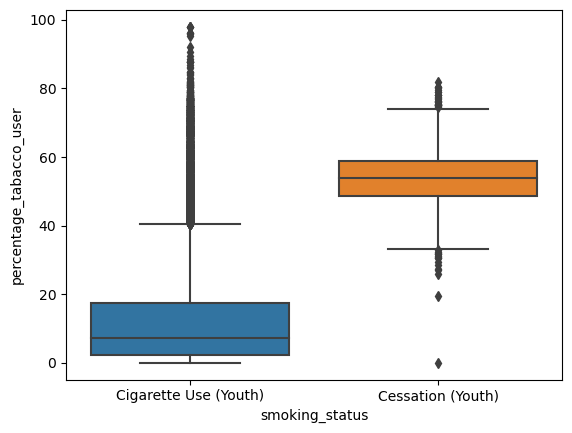

In [34]:
# Exploring Noprediction dataset
# Make a boxplot on Noprediction where the x axis is smoking_status, and the y axis is percentage_tabacco_user
sns.boxplot(data=Noprediction, x='smoking_status', y='percentage_tabacco_user')
plt.show()

<Axes: xlabel='year', ylabel='percentage_tabacco_user'>

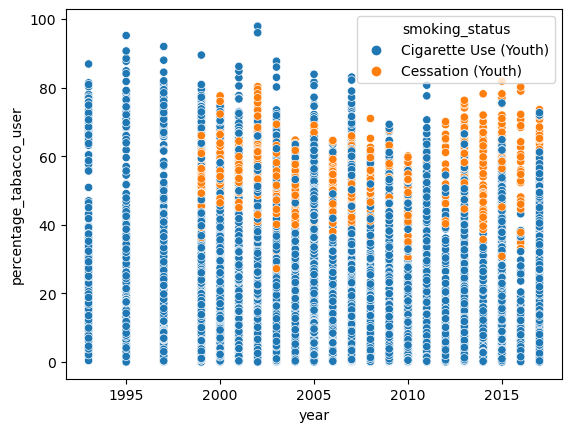

In [35]:
# Make a scatterplot on Noprediction, where x is year, y is percentage_tabacco_user and hue is smoking_status 
sns.scatterplot(data= Noprediction, x='year', y='percentage_tabacco_user', hue='smoking_status') 

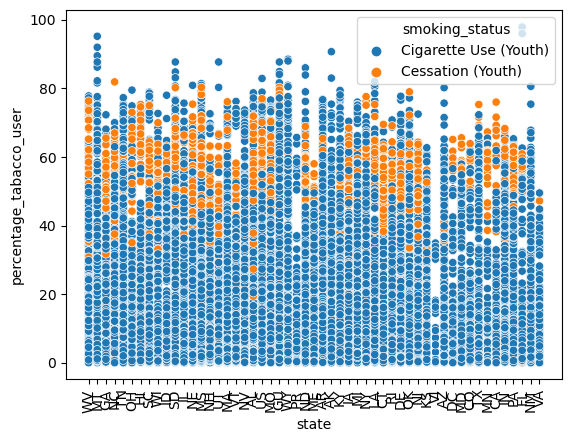

In [36]:
# Make a scatterplot on NOPrediction, where x is state, y is percentage_tabacco_user and hue is smoking_status 
sns.scatterplot(data= Noprediction, x='state', y='percentage_tabacco_user', hue='smoking_status')
plt.xticks(rotation=90)
plt.show()             ### How to make the x axies looks better?

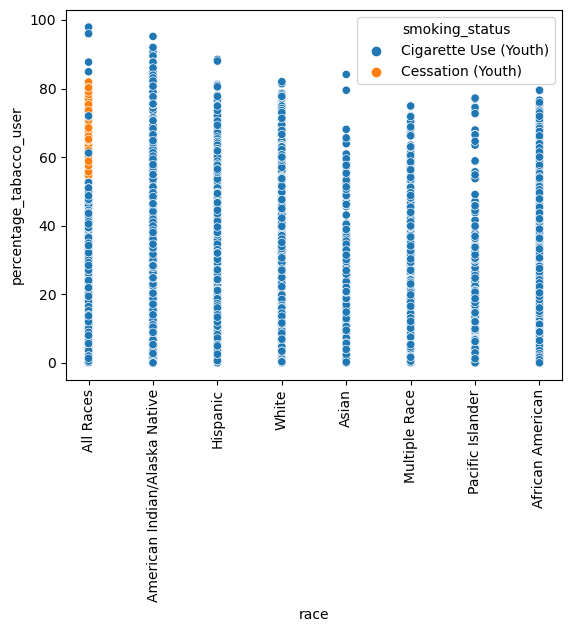

In [37]:
# Make a scatterplot on NOPrediction, where x is race, y is percentage_tabacco_user and hue is smoking_status 
sns.scatterplot(data= Noprediction, x='race', y='percentage_tabacco_user', hue='smoking_status')
plt.xticks(rotation=90)
plt.show()

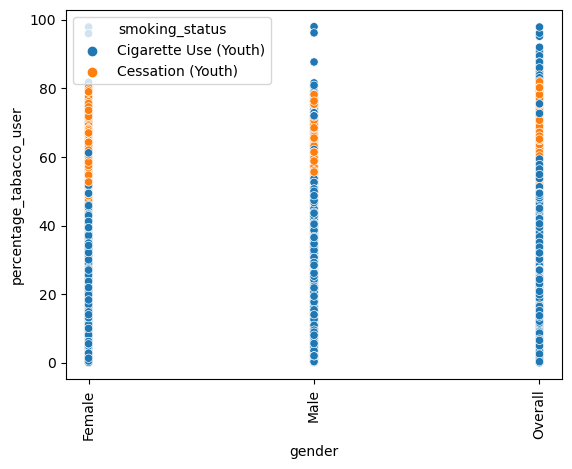

In [38]:
# Make a scatterplot on NOPrediction, where x is gender, y is percentage_tabacco_user and hue is smoking_status 
sns.scatterplot(data= Noprediction, x='gender', y='percentage_tabacco_user', hue='smoking_status')
plt.xticks(rotation=90)
plt.show()

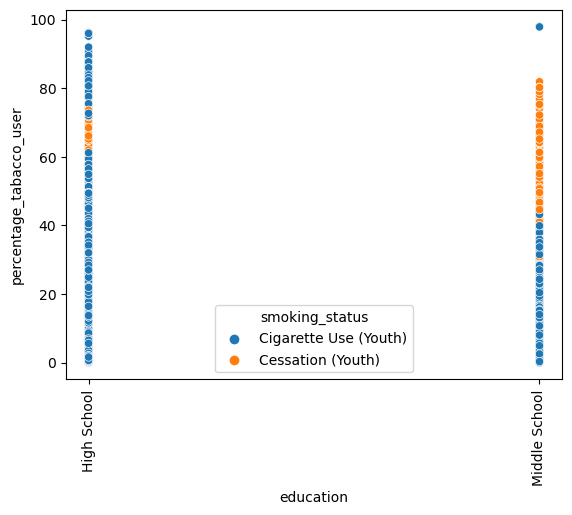

In [39]:
# Make a scatterplot on NOPrediction, where x is education, y is percentage_tabacco_user and hue is smoking_status 
sns.scatterplot(data= Noprediction, x='education', y='percentage_tabacco_user', hue='smoking_status')
plt.xticks(rotation=90)
plt.show()

conclusion:
It looks like the state, race, gender do not affect youth smoking status. 
There are more middle school students quit smoking comparing to high school students.

In [40]:
### Get the subset of df with null values in the smoking_status column, and save that subset as Prediction

In [41]:
# Get the rows whose value for the smoking column is null  
Prediction = df[df.smoking_status == 'Any Tobacco Use (Youth)']
Prediction.head() 

,year,state,smoking_status,percentage_tabacco_user,gender,race,education
14587,2015,MD,Any Tobacco Use (Youth),43.1,Overall,American Indian/Alaska Native,High School
15282,2015,DE,Any Tobacco Use (Youth),25.9,Female,All Races,High School
12729,2015,VT,Any Tobacco Use (Youth),4.9,Overall,White,Middle School
12713,2015,NY,Any Tobacco Use (Youth),19.8,Overall,African American,High School
18767,2015,DE,Any Tobacco Use (Youth),NaN,Overall,Pacific Islander,High School


In [42]:
Prediction.describe()

,year,percentage_tabacco_user
count,900.000000,615.000000
mean,2016.022222,23.283740
std,1.000309,10.600674
min,2015.000000,2.500000
25%,2015.000000,14.900000
50%,2017.000000,23.400000
75%,2017.000000,31.350000
max,2017.000000,52.700000


In [43]:
### fill the missing values

In [44]:
Prediction.isnull().sum()

year                         0
state                        0
smoking_status               0
percentage_tabacco_user    285
gender                       0
race                         0
education                    0
dtype: int64

In [45]:
Prediction.describe()

,year,percentage_tabacco_user
count,900.000000,615.000000
mean,2016.022222,23.283740
std,1.000309,10.600674
min,2015.000000,2.500000
25%,2015.000000,14.900000
50%,2017.000000,23.400000
75%,2017.000000,31.350000
max,2017.000000,52.700000


In [46]:
Prediction['percentage_tabacco_user']= Prediction['percentage_tabacco_user'].fillna(Prediction['percentage_tabacco_user'].mean)
Prediction.isnull().sum()

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_7894/3702165868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Prediction['percentage_tabacco_user']= Prediction['percentage_tabacco_user'].fillna(Prediction['percentage_tabacco_user'].mean)


year                       0
state                      0
smoking_status             0
percentage_tabacco_user    0
gender                     0
race                       0
education                  0
dtype: int64

In [47]:
Noprediction.isnull().sum()

year                          0
state                         0
smoking_status                0
percentage_tabacco_user    6376
gender                        0
race                          0
education                     0
dtype: int64

In [48]:
Noprediction.describe()

,year,percentage_tabacco_user
count,40040.000000,33664.000000
mean,2008.439436,15.523241
std,6.252824,18.221908
min,1993.000000,0.000000
25%,2003.000000,2.400000
50%,2009.000000,8.000000
75%,2013.000000,20.800000
max,2017.000000,98.000000


In [49]:
len(Noprediction)

40040

In [50]:
Noprediction['percentage_tabacco_user']=Noprediction['percentage_tabacco_user'].fillna(Noprediction['percentage_tabacco_user'].mean())
Noprediction.isnull().sum()

/var/folders/6t/3zt4r0xs2gg6kfkqfhtvlm780000gn/T/ipykernel_7894/3566304074.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Noprediction['percentage_tabacco_user']=Noprediction['percentage_tabacco_user'].fillna(Noprediction['percentage_tabacco_user'].mean())


year                       0
state                      0
smoking_status             0
percentage_tabacco_user    0
gender                     0
race                       0
education                  0
dtype: int64

In [51]:
### Divide the Noprediction subset into X and y

In [52]:
Noprediction.columns

Index(['year', 'state', 'smoking_status', 'percentage_tabacco_user', 'gender',
       'race', 'education'],
      dtype='object')

In [53]:
# Make a variable called 'features', and a list containing the strings of every column except "smoking_status"
features = ['year', 'state', 'percentage_tabacco_user', 'gender','race', 'education']
# Make an explanatory variable called X
X = Noprediction[features]
# Make a dependent variable called y
y = Noprediction.smoking_status

In [54]:
### Create dummy variables to deal with categorical inputs

In [57]:
# One-hot encode all features in X.
X=pd.get_dummies(X)

In [58]:
### Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [59]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 123
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 123) 